# Principal Component Analysis with Cancer Data

In [27]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [28]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [29]:
print(cancer_df.shape)
print(cancer_df.dtypes)

(699, 11)
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [30]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [31]:
# No missing values found. So let us try to remove ? from bare nuclei column
(cancer_df['Bare Nuclei']=='?').value_counts()[1]
# Get count of rows having ?


16

In [32]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
tp = cancer_df.describe(include="all")["Bare Nuclei"]['top']
cancer_df["Bare Nuclei"].replace("?",tp,inplace=True)
cancer_df
# Here we would like to impute it with suitable values

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [33]:
print(cancer_df.duplicated().sum())
cancer_df.drop_duplicates(keep=False,inplace=True) 
print(cancer_df.shape)
cancer_df.drop(['ID'], axis = 1,inplace=True)

9
(681, 11)


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


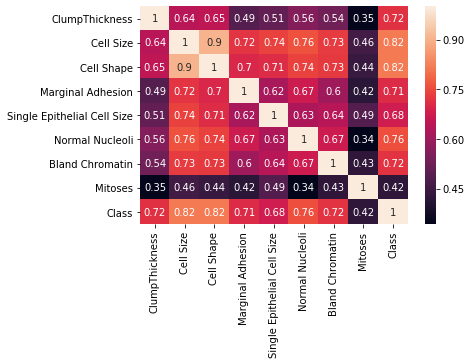

In [34]:
# Check for correlation of variable
cancer_df.corr()
sns.heatmap(cancer_df.corr(), annot=True)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/Users/garimatiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/garimatiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


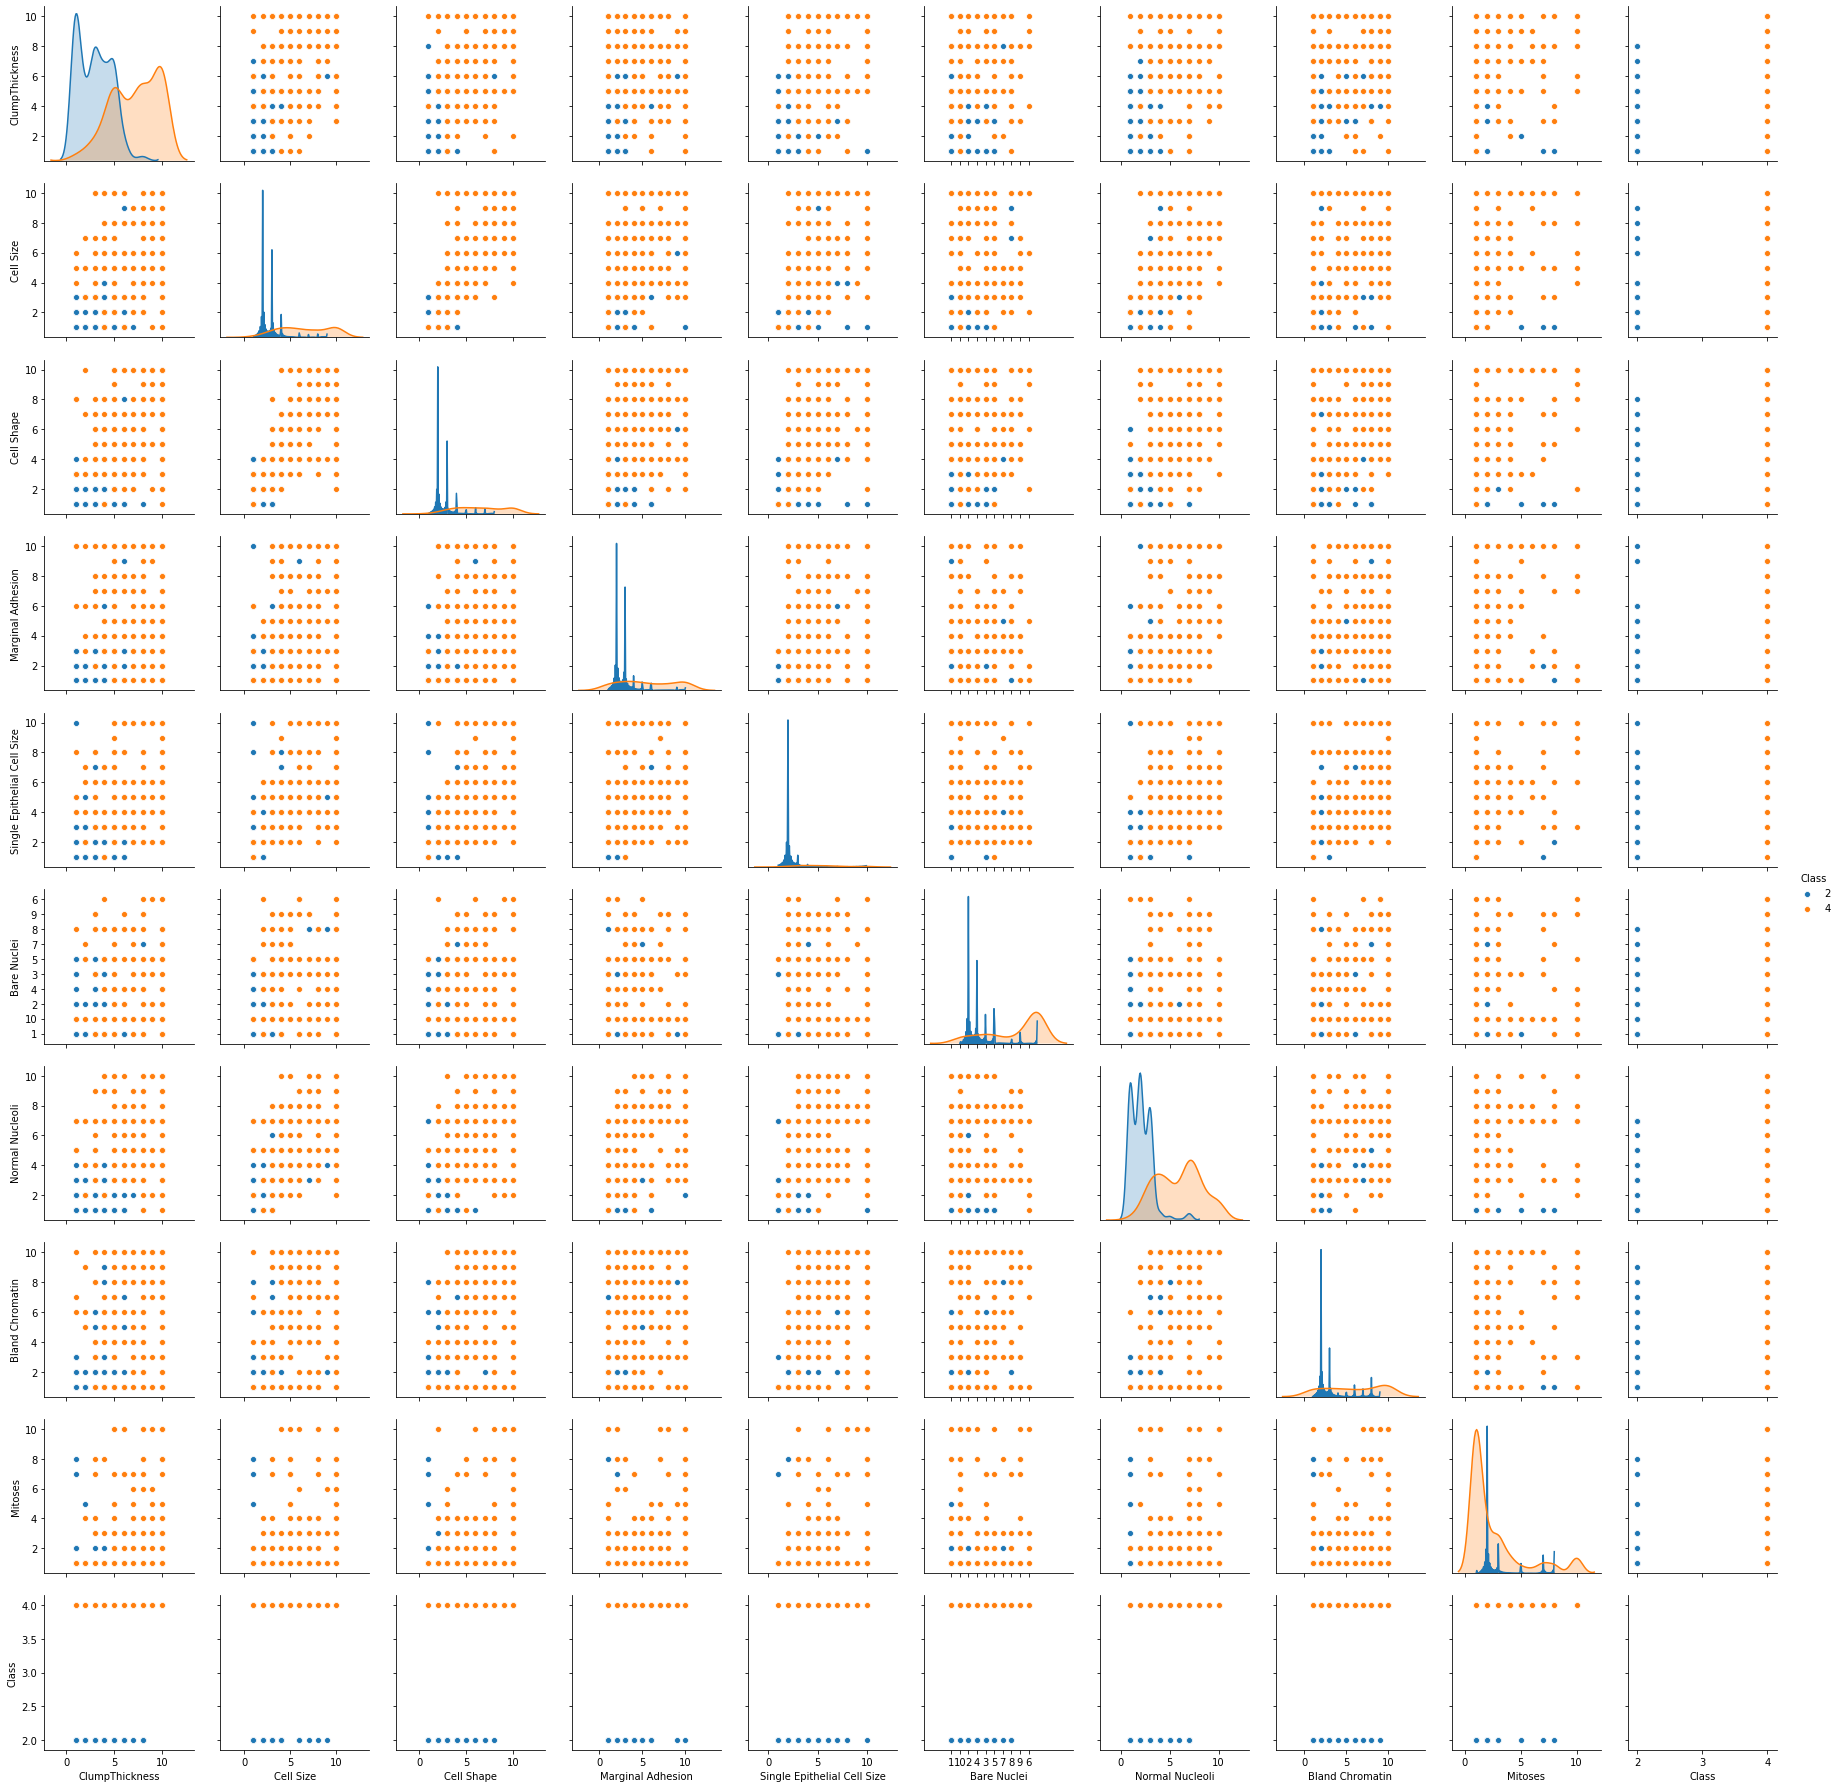

In [73]:
#Let us check for pair plots
sns.pairplot(cancer_df,hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

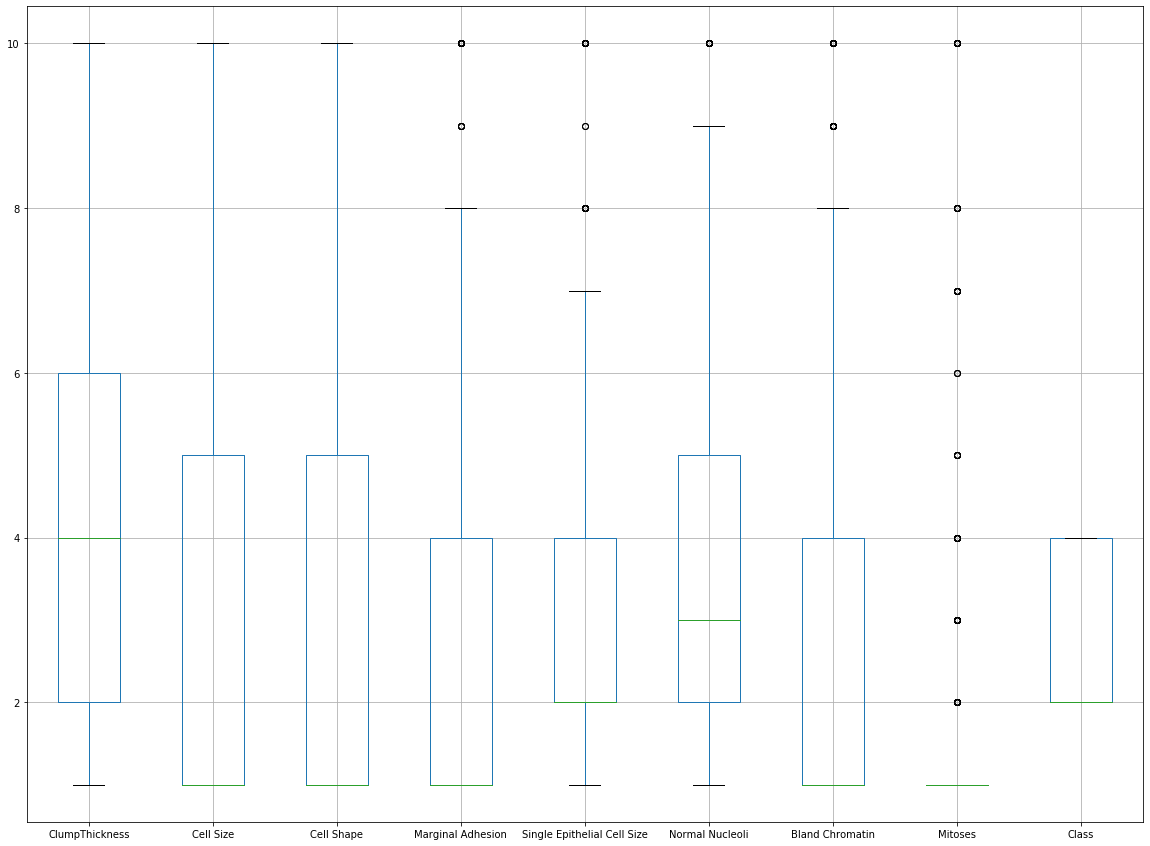

In [35]:
cancer_df.boxplot(figsize=(20,15))

In [36]:
pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [37]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion']>4,4,cancer_df['Marginal Adhesion'])
pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,15,161


In [38]:
pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,7,41
5,5,34
6,2,39
7,3,9
8,2,17
9,0,2


In [39]:
cancer_df['Single Epithelial Cell Size'] = np.where(cancer_df['Single Epithelial Cell Size']>4,4,cancer_df['Single Epithelial Cell Size'])
pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,20,170


In [40]:
pd.crosstab(cancer_df['Normal Nucleoli'],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,148,2
2,157,7
3,121,34
4,8,32
5,4,30
6,1,9
7,7,62
8,0,28
9,0,11


In [41]:
cancer_df['Normal Nucleoli'] = np.where(cancer_df['Normal Nucleoli']>5,5,cancer_df['Normal Nucleoli'])
pd.crosstab(cancer_df['Normal Nucleoli'],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,148,2
2,157,7
3,121,34
4,8,32
5,12,160


In [42]:
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,390,39
2,30,6
3,12,28
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [43]:
cancer_df['Bland Chromatin'] = np.where(cancer_df['Bland Chromatin']>4,4,cancer_df['Bland Chromatin'])
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,390,39
2,30,6
3,12,28
4,14,162


In [44]:
pd.crosstab(cancer_df['Mitoses'],cancer_df['Class'])

Class,2,4
Mitoses,,
1,433,130
2,8,27
3,2,29
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [45]:
cancer_df['Mitoses'] = np.where(cancer_df['Mitoses']>2,2,cancer_df['Mitoses'])
pd.crosstab(cancer_df['Mitoses'],cancer_df['Class'])

Class,2,4
Mitoses,,
1,433,130
2,13,105


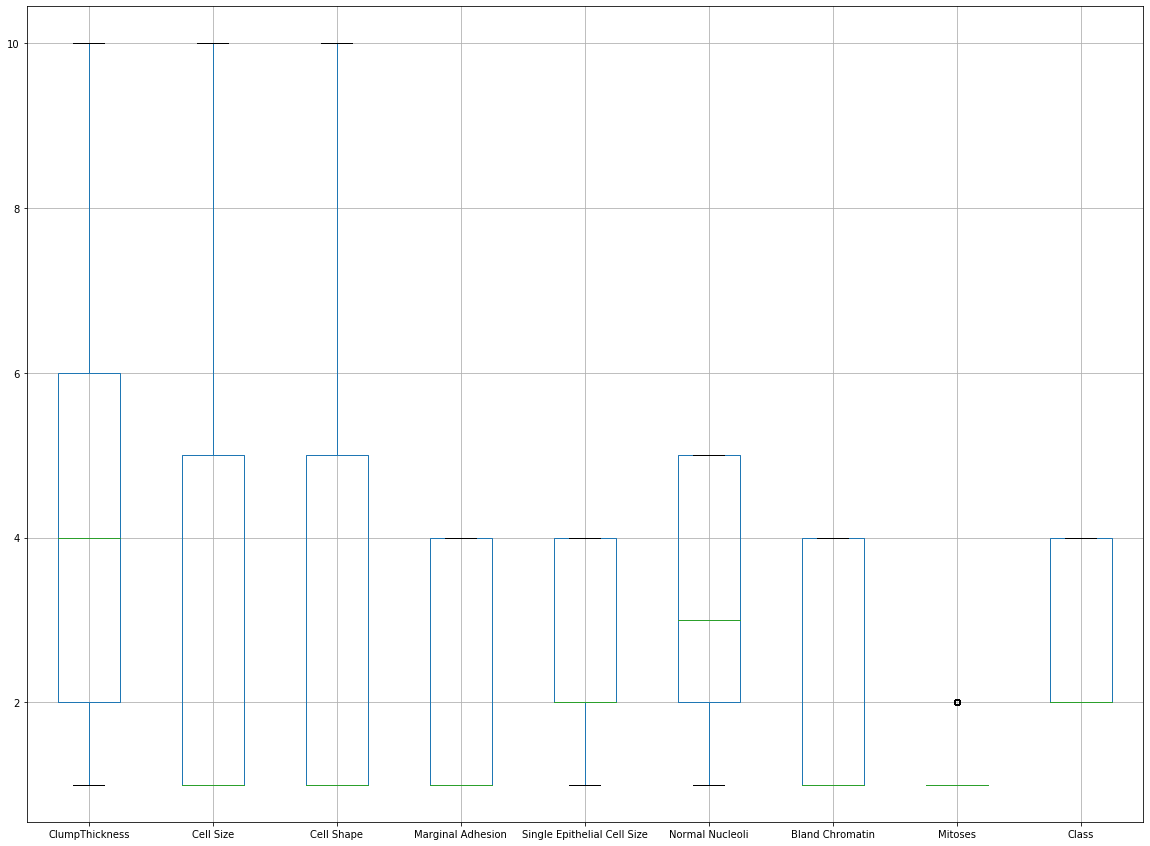

In [46]:
cancer_df.boxplot(figsize=(20,15))

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [47]:
cov = cancer_df.cov()
cov

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,7.946826,5.484342,5.425952,2.036046,1.571625,2.406239,2.104852,0.473555,1.924929
Cell Size,5.484342,9.200155,8.085139,2.877578,2.248840,3.227313,2.888073,0.563831,2.358655
Cell Shape,5.425952,8.085139,8.699175,2.730265,2.120767,3.069256,2.781535,0.516561,2.290365
Marginal Adhesion,2.036046,2.877578,2.730265,1.697905,0.874765,1.257349,1.116064,0.205962,0.920981
Single Epithelial Cell Size,1.571625,2.248840,2.120767,0.874765,0.926112,0.962959,0.911931,0.165408,0.704565
Normal Nucleoli,2.406239,3.227313,3.069256,1.257349,0.962959,2.180297,1.336255,0.226268,1.084137
Bland Chromatin,2.104852,2.888073,2.781535,1.116064,0.911931,1.336255,1.722044,0.246193,0.958141
Mitoses,0.473555,0.563831,0.516561,0.205962,0.165408,0.226268,0.246193,0.143461,0.189060
Class,1.924929,2.358655,2.290365,0.920981,0.704565,1.084137,0.958141,0.189060,0.905330


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [48]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.44350587 -0.88611672 -0.10447324 -0.00721168  0.06849458 -0.01522235
  -0.04678134  0.00340905 -0.00311238]
 [ 0.56461636  0.34212184 -0.15323282 -0.0219095   0.02081363 -0.07927439
  -0.72081199 -0.03538834 -0.11252024]
 [ 0.54777397  0.29233873 -0.41946141  0.02314074  0.04120554 -0.01198505
   0.65798874  0.05531205 -0.01217533]
 [ 0.19841367  0.06701099  0.35522418  0.01582068  0.09020556 -0.184761
  -0.0054538   0.48877812  0.74060756]
 [ 0.15247697  0.05159325  0.18946699  0.0084992   0.18181302  0.9329094
  -0.01156972 -0.11249197  0.14817118]
 [ 0.22743773  0.04344491  0.64111761  0.04514871  0.1184887  -0.05301282
   0.1507019   0.33225751 -0.61915942]
 [ 0.2023721   0.05480566  0.42968832 -0.05278417  0.13126489 -0.27028863
   0.1396762  -0.79229186  0.17635589]
 [ 0.03900767 -0.00943806  0.03421866  0.96899435 -0.22675783  0.00845719
  -0.0194245  -0.07356974  0.03143104]
 [ 0.16623295 -0.01246341  0.17532956 -0.23416944 -0.93236002  0.11377961
   0.05

# Q8 Find variance and cumulative variance by each eigen vector

In [49]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(26.039149857468356, array([0.44350587, 0.56461636, 0.54777397, 0.19841367, 0.15247697,
       0.22743773, 0.2023721 , 0.03900767, 0.16623295])), (3.5777761437316227, array([-0.88611672,  0.34212184,  0.29233873,  0.06701099,  0.05159325,
        0.04344491,  0.05480566, -0.00943806, -0.01246341])), (1.1941042503329373, array([-0.10447324, -0.15323282, -0.41946141,  0.35522418,  0.18946699,
        0.64111761,  0.42968832,  0.03421866,  0.17532956])), (0.8496843971462626, array([-0.04678134, -0.72081199,  0.65798874, -0.0054538 , -0.01156972,
        0.1507019 ,  0.1396762 , -0.0194245 ,  0.05030891])), (0.6501039648539343, array([-0.00311238, -0.11252024, -0.01217533,  0.74060756,  0.14817118,
       -0.61915942,  0.17635589,  0.03143104,  0.03576757])), (0.5804729108811233, array([ 0.00340905, -0.03538834,  0.05531205,  0.48877812, -0.11249197,
        0.33225751, -0.79229186, -0.07356974, -0.02416955])), (0.2773793675645886, array([-0.01522235, -0.07927439, -0.01198505, -0.184761  

In [51]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(var_explained)
print(cum_var_exp)

[0.7791182816428398, 0.10705076073777556, 0.0357288335723055, 0.025423435521780568, 0.01945178267181106, 0.01736834955601306, 0.008299477417774315, 0.004693218251871676, 0.002865860627828635]
[0.77911828 0.88616904 0.92189788 0.94732131 0.96677309 0.98414144
 0.99244092 0.99713414 1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [53]:
from sklearn.decomposition import PCA
X=cancer_df.drop(['Class'], axis = 1)

In [54]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Q10 Find correlation between components and features

In [55]:
pcacomp = pca.components_
pcacomp

array([[ 3.75337587e-01,  4.75252668e-01,  4.64478663e-01,
         1.77556091e-01,  1.33650383e-01,  5.43442517e-01,
         2.01655761e-01,  1.75875903e-01,  3.46472251e-02],
       [ 2.92137350e-01,  3.77570740e-01,  3.25131366e-01,
        -2.59906411e-02,  2.14409088e-02, -8.14596995e-01,
        -1.27555733e-02,  3.89556736e-02,  1.40013962e-03],
       [ 8.77749225e-01, -3.54438883e-01, -3.02435621e-01,
        -6.44590706e-02, -5.15059681e-02,  2.85154091e-02,
        -4.12984651e-02, -5.51641129e-02,  9.61578294e-03],
       [-3.49367175e-02,  1.31119703e-01, -5.19945977e-01,
         2.62151074e-01,  1.74738710e-01, -1.51914865e-01,
         6.29562877e-01,  4.37883368e-01,  2.85839419e-02],
       [ 3.99495460e-02,  6.69166873e-01, -5.56586131e-01,
         3.28593328e-02, -2.03511593e-02,  9.22555672e-02,
        -3.74139801e-01, -3.00876957e-01,  1.78627584e-02],
       [-6.03431600e-04,  1.54469964e-01, -1.23119573e-02,
        -6.69552691e-01, -1.76038278e-01,  5.503472

In [57]:
pca_df = pd.DataFrame(pcacomp,columns=X.columns)
pca_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.375338,0.475253,0.464479,0.177556,0.133650,0.543443,0.201656,0.175876,0.034647
1,0.292137,0.377571,0.325131,-0.025991,0.021441,-0.814597,-0.012756,0.038956,0.001400
2,0.877749,-0.354439,-0.302436,-0.064459,-0.051506,0.028515,-0.041298,-0.055164,0.009616
3,-0.034937,0.131120,-0.519946,0.262151,0.174739,-0.151915,0.629563,0.437883,0.028584
4,0.039950,0.669167,-0.556586,0.032859,-0.020351,0.092256,-0.374140,-0.300877,0.017863
5,-0.000603,0.154470,-0.012312,-0.669553,-0.176038,0.055035,0.577441,-0.398429,-0.038524
6,-0.006945,0.095301,-0.080715,-0.651857,0.080695,0.069414,-0.294164,0.675230,0.075090
7,-0.004305,-0.083893,-0.000572,-0.143368,0.954162,-0.022446,-0.021709,-0.246764,-0.009829
8,-0.021215,-0.031470,0.016827,0.008209,-0.012319,-0.018671,0.026364,-0.081632,0.995163


In [58]:
pca_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.375338,0.475253,0.464479,0.177556,0.133650,0.543443,0.201656,0.175876,0.034647
1,0.292137,0.377571,0.325131,-0.025991,0.021441,-0.814597,-0.012756,0.038956,0.001400
2,0.877749,-0.354439,-0.302436,-0.064459,-0.051506,0.028515,-0.041298,-0.055164,0.009616
3,-0.034937,0.131120,-0.519946,0.262151,0.174739,-0.151915,0.629563,0.437883,0.028584
4,0.039950,0.669167,-0.556586,0.032859,-0.020351,0.092256,-0.374140,-0.300877,0.017863


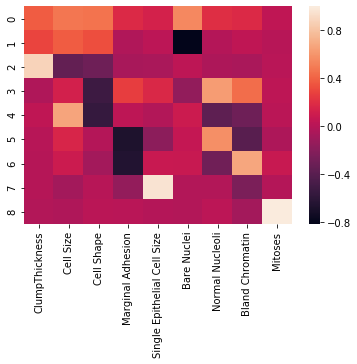

In [61]:
sns.heatmap(pca_df)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [62]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [63]:
rating = (jokes_df.head(200)).drop('NumJokes',axis=1)
rating

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [64]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 100 columns):
Joke1      200 non-null float64
Joke2      200 non-null float64
Joke3      200 non-null float64
Joke4      200 non-null float64
Joke5      200 non-null float64
Joke6      200 non-null float64
Joke7      200 non-null float64
Joke8      200 non-null float64
Joke9      200 non-null float64
Joke10     200 non-null float64
Joke11     200 non-null float64
Joke12     200 non-null float64
Joke13     200 non-null float64
Joke14     200 non-null float64
Joke15     200 non-null float64
Joke16     200 non-null float64
Joke17     200 non-null float64
Joke18     200 non-null float64
Joke19     200 non-null float64
Joke20     200 non-null float64
Joke21     200 non-null float64
Joke22     200 non-null float64
Joke23     200 non-null float64
Joke24     200 non-null float64
Joke25     200 non-null float64
Joke26     200 non-null float64
Joke27     200 non-null float64
Joke28     200 non-null float6

In [66]:
rating.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [68]:
rating.mean()

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
Joke6      1.32005
Joke7      0.17150
Joke8     -0.08530
Joke9      0.01670
Joke10     0.89470
Joke11     1.16675
Joke12     1.34195
Joke13    -1.34810
Joke14     1.96950
Joke15    -1.57630
Joke16    -2.85160
Joke17    -0.82600
Joke18    -0.74145
Joke19     0.30400
Joke20    -0.82725
Joke21     2.56045
Joke22     0.93365
Joke23     0.34435
Joke24    -1.09905
Joke25     0.56475
Joke26     1.15680
Joke27     3.05240
Joke28     1.15585
Joke29     3.18995
Joke30    -0.70215
            ...   
Joke71    -0.15430
Joke72     1.12100
Joke73     0.36100
Joke74    -0.40885
Joke75    -0.14515
Joke76     0.67045
Joke77     0.21805
Joke78     0.72365
Joke79     0.27445
Joke80     0.57735
Joke81     0.49335
Joke82     0.30125
Joke83     0.88235
Joke84     0.40525
Joke85     0.42435
Joke86     0.24565
Joke87     0.60490
Joke88     0.83650
Joke89     1.44285
Joke90    -0.34395
Joke91     0.56260
Joke92     0